In [1]:
import matplotlib.pyplot as plt
from sectioning import obtain_sections, draw_sections, sectionize_image, merge_all_sections, get_section
import cv2

In [2]:
IMG_NAME = "hiragana_sign_1.png"

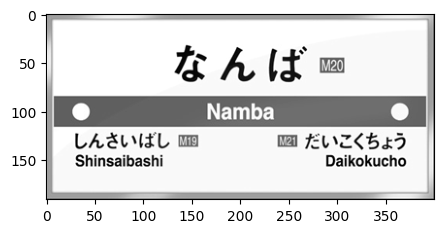

In [3]:
# B&W Convertion
img = cv2.imread("./images/"+IMG_NAME)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


fig = plt.figure()
fig.set_size_inches(5, 5)
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
_, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

In [5]:
img = img[10:180, 10:380]

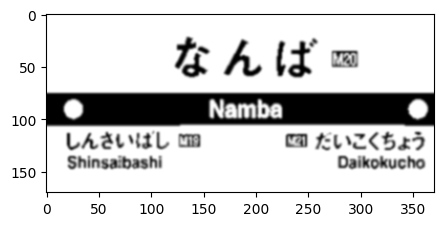

In [6]:
# Blurred
blurred_image = cv2.GaussianBlur(img, (5, 5), 0)

fig = plt.figure()
fig.set_size_inches(5, 5)
plt.imshow(blurred_image, cmap='gray')
plt.show()

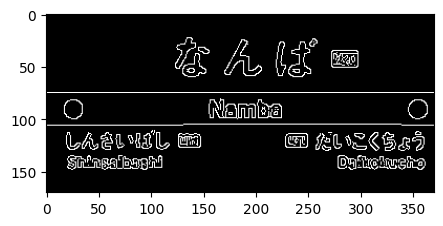

In [7]:
# Canny
canny_image = cv2.Canny(blurred_image, 225, 255)

fig = plt.figure()
fig.set_size_inches(5, 5)
plt.imshow(canny_image, cmap='gray')
plt.show()

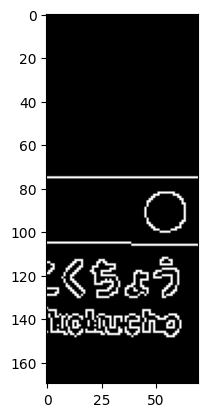

In [8]:
plt.imshow(canny_image[0:200, 300:400], cmap="grey")

In [9]:
sections_limits, _ = obtain_sections(canny_image)

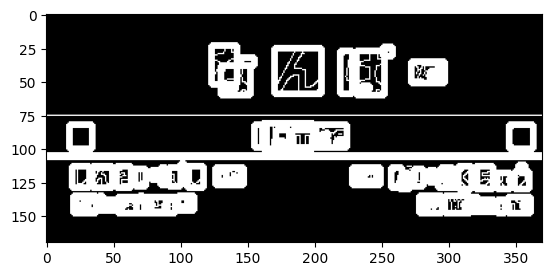

In [10]:
plt.imshow(draw_sections(canny_image, sections_limits), cmap="grey")

In [11]:
new_sections_limits = merge_all_sections(sections_limits, 2)

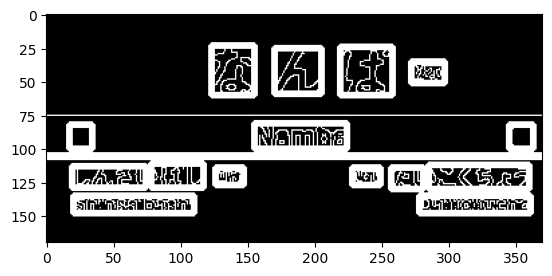

In [12]:
plt.imshow(draw_sections(canny_image, new_sections_limits), cmap="grey")

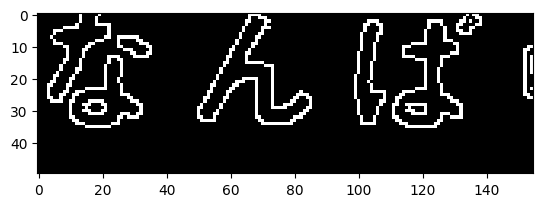

In [13]:
plt.imshow(canny_image[25:75, 120:275], cmap="grey")

In [14]:
for idx, section_limits in enumerate(new_sections_limits):
    if section_limits[0][0] > 25 and section_limits[0][1] < 75 and section_limits[1][0] > 120 and section_limits[1][1] < 275:
        print(idx, section_limits)

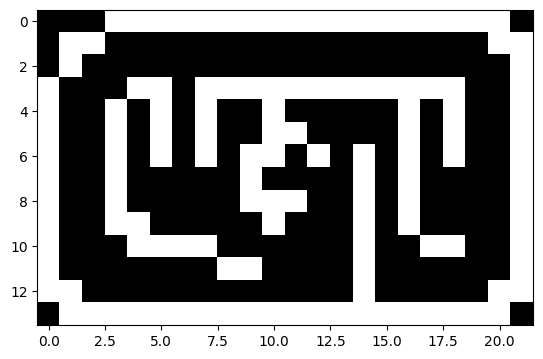

In [15]:
plt.imshow(get_section(canny_image, new_sections_limits[7]), cmap="grey")

In [16]:
sections = sectionize_image(canny_image, new_sections_limits)

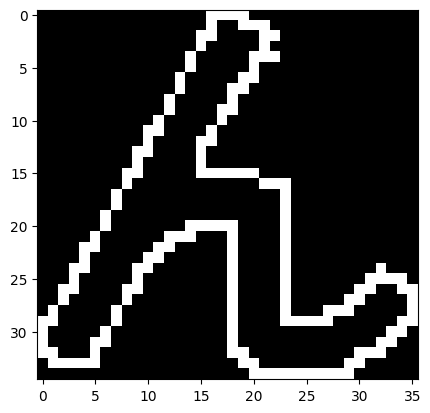

In [17]:
plt.imshow(sections[12], cmap="grey")